In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
!pip install --upgrade scikit-learn imbalanced-learn

In [ ]:
!pip install -U scikit-learn imbalanced-learn

In [1]:
import numpy as np
import pandas as pd
import os
import glob
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.auto import tqdm

sns.set_style('darkgrid')

In [2]:
DATA_DIR = "/kaggle/input/new-data/"

In [3]:
from glob import glob

image_paths = []

extensions = ['**/*.jpg', '**/*.JPG', '**/*.png', '**/*.jpeg']

for ext in extensions:
    image_paths.extend(glob(os.path.join(DATA_DIR, ext), recursive=True))

print("Found:", len(image_paths))

Found: 5703


In [4]:
data = []
for path in tqdm(image_paths):
    try:
        label = os.path.basename(os.path.dirname(path))
        data.append({'image_path': path, 'label': label})
    except Exception as e:
        print(f"Error processing {path}: {e}")

df = pd.DataFrame(data)

print("\nDataFrame Head:")
print(df.head())

print(f"\nSample Path: {df['image_path'].iloc[0]}")
print(f"Sample Label: {df['label'].iloc[0]}")

  0%|          | 0/5703 [00:00<?, ?it/s]


DataFrame Head:
                                          image_path           label
0  /kaggle/input/new-data/Bitter gourd/Bitter_gou...  Bitter_gourd_K
1  /kaggle/input/new-data/Bitter gourd/Bitter_gou...  Bitter_gourd_K
2  /kaggle/input/new-data/Bitter gourd/Bitter_gou...  Bitter_gourd_K
3  /kaggle/input/new-data/Bitter gourd/Bitter_gou...  Bitter_gourd_K
4  /kaggle/input/new-data/Bitter gourd/Bitter_gou...  Bitter_gourd_K

Sample Path: /kaggle/input/new-data/Bitter gourd/Bitter_gourd_K/bitter_gourd__K-42-_JPG_jpg.rf.422423552394956736ace77137f06150.jpg
Sample Label: Bitter_gourd_K


In [5]:
import os
import pandas as pd
from glob import glob
from tqdm.auto import tqdm

OLID_DIR = "/kaggle/input/olid-i/"

olid_paths = []
extensions = ['**/*.jpg', '**/*.JPG', '**/*.png', '**/*.jpeg']

for ext in extensions:
    olid_paths.extend(glob(os.path.join(OLID_DIR, ext), recursive=True))

print(f"Found {len(olid_paths)} OLID images.")

olid_data = []
for path in tqdm(olid_paths, desc="Processing OLID"):
    try:
        label = os.path.basename(os.path.dirname(path))
        olid_data.append({'image_path': path, 'label': label})
    except Exception as e:
        print(f"Error processing {path}: {e}")

df_olid = pd.DataFrame(olid_data)

df_combined = pd.concat([df, df_olid], ignore_index=True)

print("\n--- Merge Complete ---")
print(f"New Data count: {len(df)}")
print(f"OLID Data count: {len(df_olid)}")
print(f"Total Combined count: {len(df_combined)}")

print("\nSample Rows:")
print(df_combined.sample(5))


Found 4749 OLID images.


Processing OLID:   0%|          | 0/4749 [00:00<?, ?it/s]


--- Merge Complete ---
New Data count: 5703
OLID Data count: 4749
Total Combined count: 10452

Sample Rows:
                                              image_path  \
10105  /kaggle/input/olid-i/eggplant__N/eggplant__N (...   
8896   /kaggle/input/olid-i/snake_gourd__K/snake_gour...   
347    /kaggle/input/new-data/Bitter gourd/Bitter_gou...   
421    /kaggle/input/new-data/Bitter gourd/Bitter_gou...   
10171  /kaggle/input/olid-i/bottle_gourd__JAS_MIT/bot...   

                       label  
10105            eggplant__N  
8896          snake_gourd__K  
347           Bitter_gourd_N  
421           Bitter_gourd_N  
10171  bottle_gourd__JAS_MIT  


In [6]:
df = df_combined


--- Dataset Analysis ---
Total number of images: 10452
Total number of classes: 69

Class Distribution (Value Counts):
label
Cucumber_Healthy         1235
Cucumber_PM              1191
Bottel_gourd_DM           695
Tomato_Healthy            601
Bottel_gourd_healthy      521
                         ... 
bottle_gourd__JAS_MIT      29
bottle_gourd__DM           28
bottle_gourd__LS           28
ridge_gourd__PLEI_MIT      25
bottle_gourd__JAS          24
Name: count, Length: 69, dtype: int64


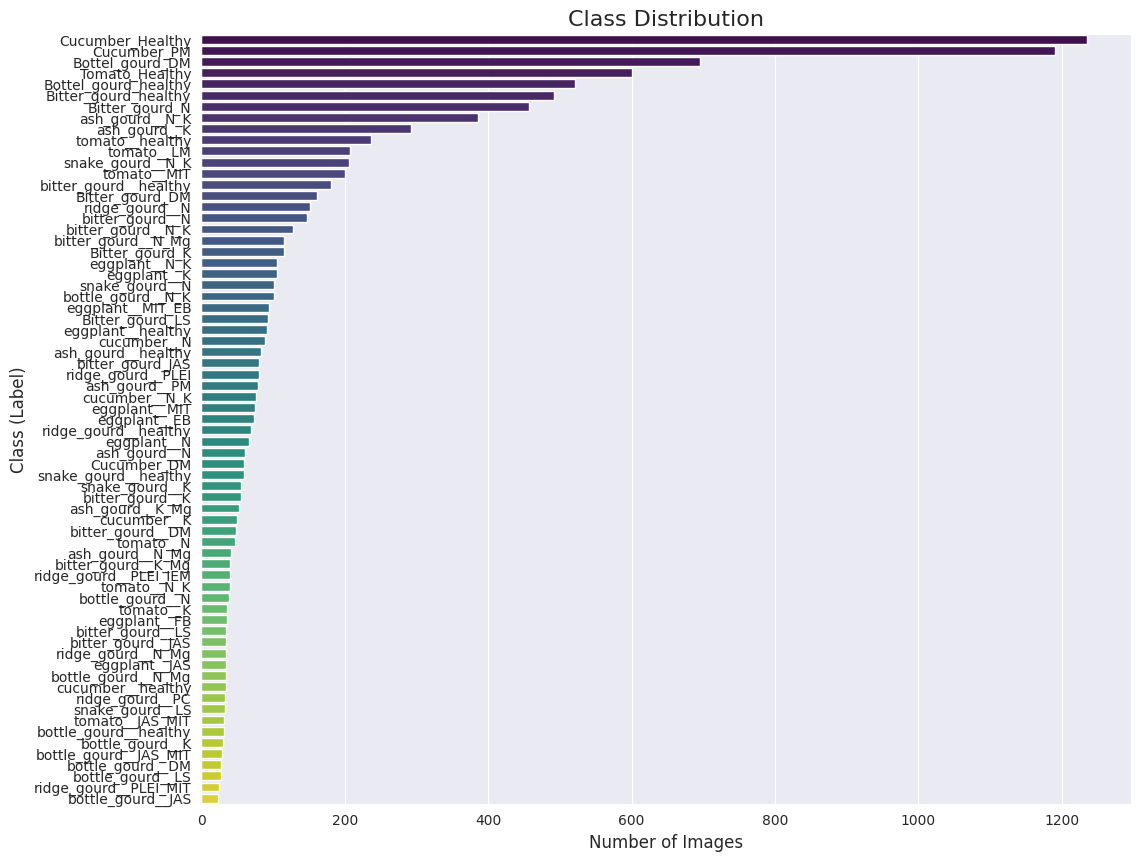

In [7]:
print("\n--- Dataset Analysis ---")
print(f"Total number of images: {len(df)}")
num_classes = df['label'].nunique()
print(f"Total number of classes: {num_classes}")

print("\nClass Distribution (Value Counts):")
print(df['label'].value_counts())

plt.figure(figsize=(12, 10))
sns.countplot(y='label', data=df, order=df['label'].value_counts().index, palette='viridis')
plt.title('Class Distribution', fontsize=16)
plt.xlabel('Number of Images', fontsize=12)
plt.ylabel('Class (Label)', fontsize=12)
plt.show()

In [8]:

new_dataset_labels = set(df['label'].unique())
olid_dataset_labels = set(df_olid['label'].unique())

unique_new_labels = new_dataset_labels - olid_dataset_labels

print(f"Found {len(unique_new_labels)} labels in the new dataset that don't match OLID:")
print("------------------------------------------------")
for label in sorted(list(unique_new_labels)):
    print(label)

Found 12 labels in the new dataset that don't match OLID:
------------------------------------------------
Bitter_gourd_DM
Bitter_gourd_K
Bitter_gourd_LS
Bitter_gourd_N
Bitter_gourd_healthy
Bottel_gourd_DM
Bottel_gourd_healthy
Cucumber_DM
Cucumber_Healthy
Cucumber_PM
Tomato_Healthy
bitter_gourd_JAS


In [10]:
df_combined = df_combined[~df_combined['label'].isin(['Cucumber_DM', 'Cucumber_PM', 'cucumber__DM', 'cucumber__PM'])].copy()

In [11]:
label_corrections = {
    'Bitter_gourd_DM':      'bitter_gourd__DM',
    'Bitter_gourd_K':       'bitter_gourd__K',
    'Bitter_gourd_LS':      'bitter_gourd__LS',
    'Bitter_gourd_N':       'bitter_gourd__N',
    'Bitter_gourd_healthy': 'bitter_gourd__healthy',
    'Tomato_Healthy':       'tomato__healthy',
    'Cucumber_Healthy':     'cucumber__healthy',
    
    'Bottel_gourd_DM':      'bottle_gourd__DM',
    'Bottel_gourd_healthy': 'bottle_gourd__healthy',

    'bitter_gourd_JAS':     'bitter_gourd__JAS',

    'Cucumber_DM':          'cucumber__DM',
    'Cucumber_PM':          'cucumber__PM'
}

print("--- Fixing Labels ---")
print(f"Unique classes before fix: {df_combined['label'].nunique()}")

df_combined['label'] = df_combined['label'].replace(label_corrections)

print(f"Unique classes after fix: {df_combined['label'].nunique()}")

print("\nTop 10 classes now:")
print(df_combined['label'].value_counts().head(10))

--- Fixing Labels ---
Unique classes before fix: 57
Unique classes after fix: 57

Top 10 classes now:
label
cucumber__healthy        1269
tomato__healthy           837
bottle_gourd__DM          723
bitter_gourd__healthy     673
bitter_gourd__N           604
bottle_gourd__healthy     552
ash_gourd__N_K            386
ash_gourd__K              293
bitter_gourd__DM          209
tomato__LM                207
Name: count, dtype: int64


In [12]:
df = df_combined


--- Single Image Inspection ---
Successfully read image: /kaggle/input/new-data/Bitter gourd/Bitter_gourd_K/bitter_gourd__K-8-_JPG_jpg.rf.b3f406c9950f1a5336650538d3584e18.jpg
Image shape: (640, 640, 3)


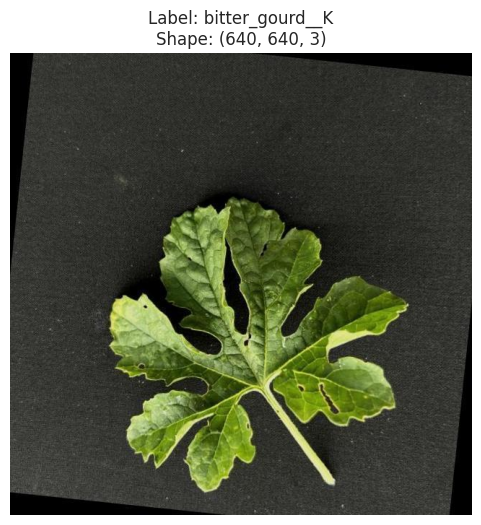


--- Grid of Sample Images ---


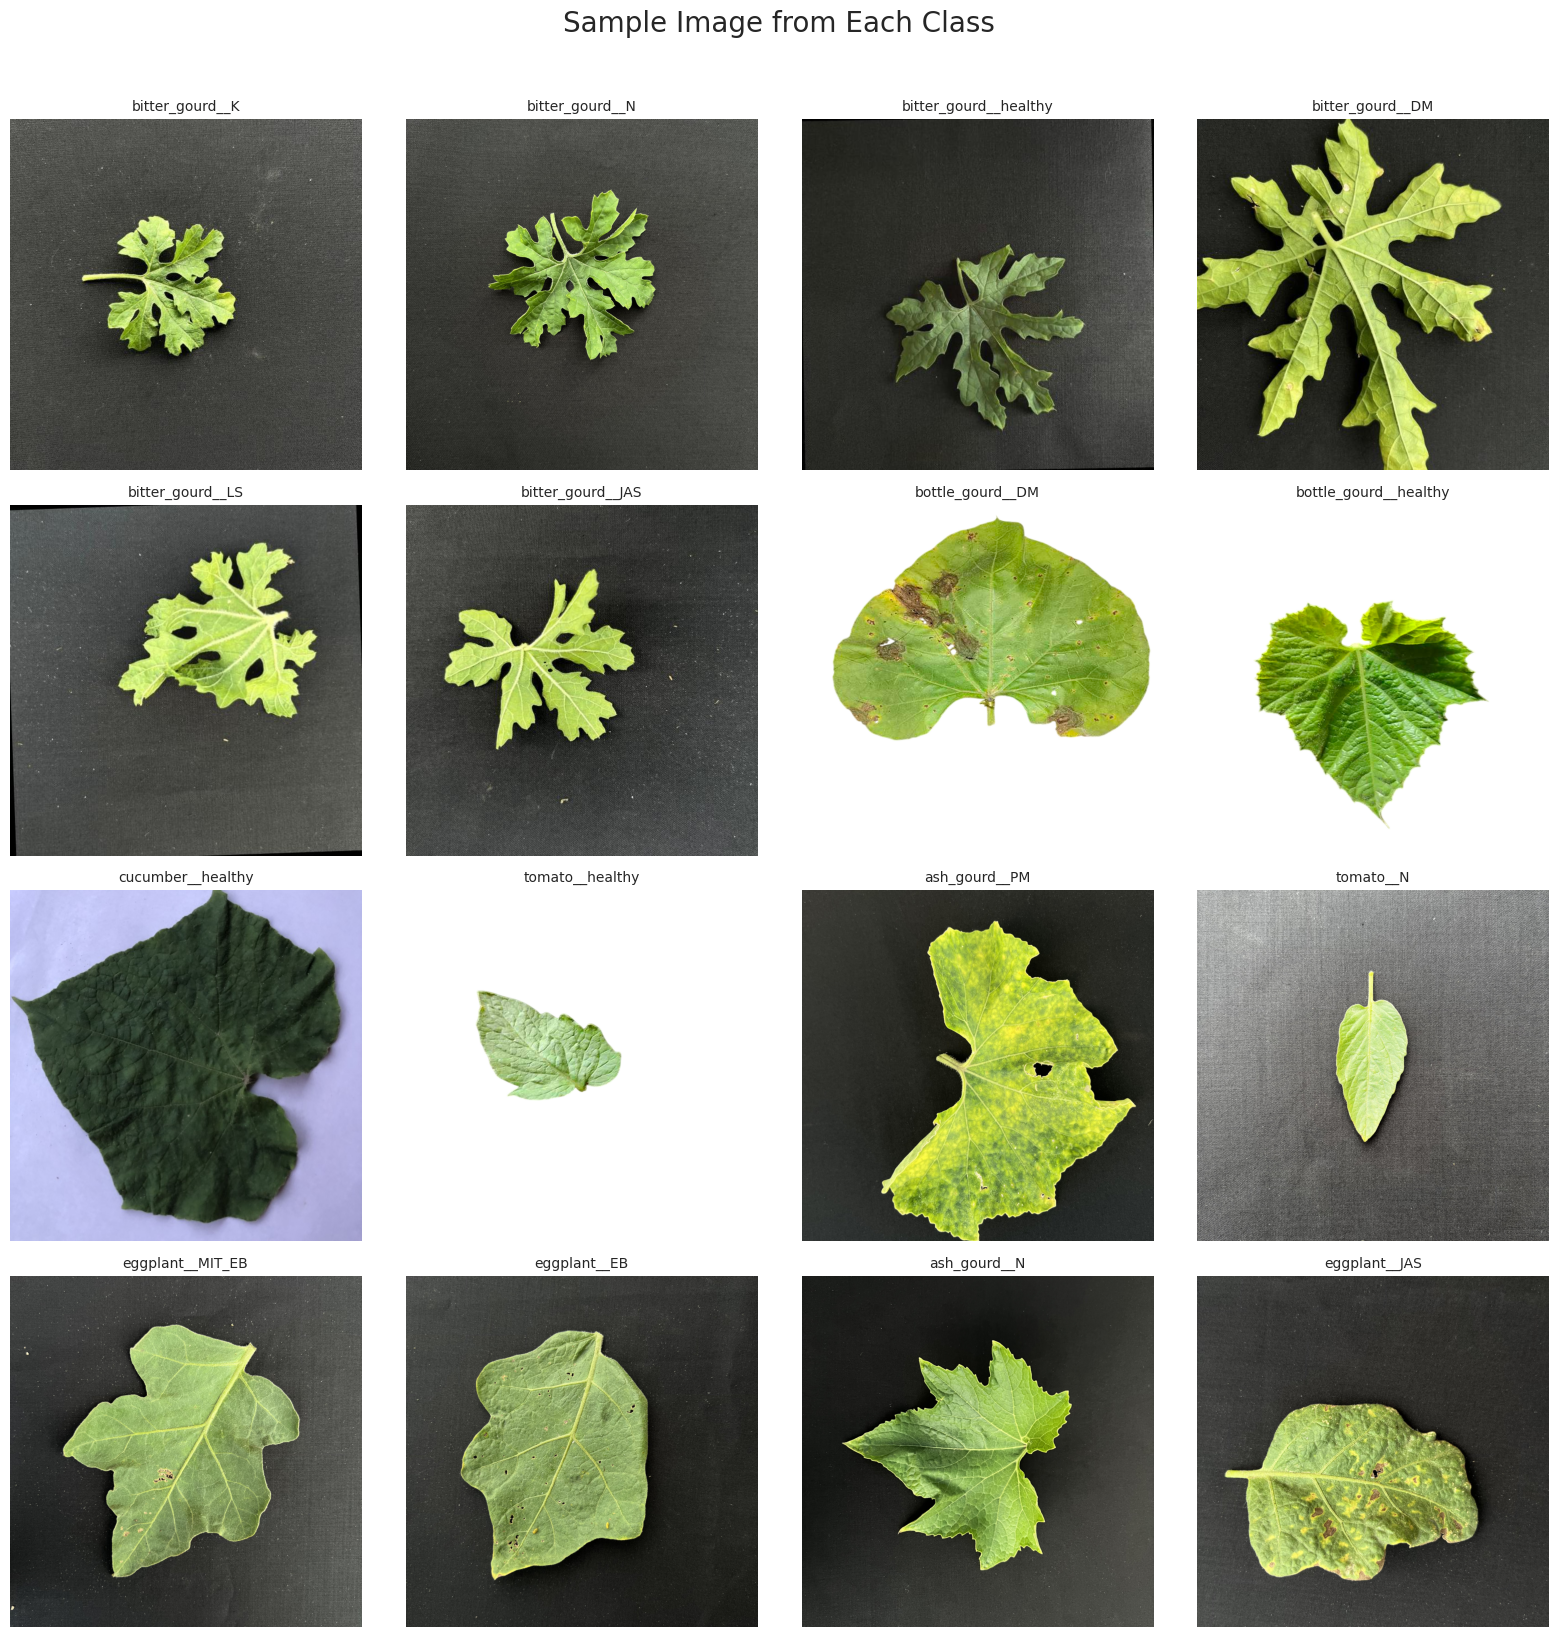

In [13]:
print("\n--- Single Image Inspection ---")
sample_row = df.iloc[5]
sample_path = sample_row['image_path']
sample_label = sample_row['label']

image_bgr = cv2.imread(sample_path)

if image_bgr is not None:
    print(f"Successfully read image: {sample_path}")
    
    print(f"Image shape: {image_bgr.shape}")

    image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)
    
    plt.figure(figsize=(6, 6))
    plt.imshow(image_rgb)
    plt.title(f"Label: {sample_label}\nShape: {image_bgr.shape}")
    plt.axis('off')
    plt.show()

else:
    print(f"Error: Could not read image at {sample_path}")

print("\n--- Grid of Sample Images ---")
unique_labels = df['label'].unique()

grid_size = min(num_classes, 16) 
cols = 4
rows = int(np.ceil(grid_size / cols))

plt.figure(figsize=(cols * 4, rows * 4))
for i, label in enumerate(unique_labels[:grid_size]):
    path = df[df['label'] == label].sample(1)['image_path'].values[0]
    
    img_bgr = cv2.imread(path)
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
    
    plt.subplot(rows, cols, i + 1)
    plt.imshow(img_rgb)
    plt.title(label, fontsize=10)
    plt.axis('off')

plt.suptitle("Sample Image from Each Class", fontsize=20, y=1.02)
plt.tight_layout()
plt.show()

In [14]:
df[['plant_type', 'status']] = df['label'].str.split('__', n=1, expand=True)

print("--- Before Filtering ---")
print(f"Original number of images: {len(df)}")
print(f"Original number of classes: {df['label'].nunique()}")

df_filtered = df[~df['status'].str.contains('_')].copy()

print("\n--- After Filtering ---")
print(f"Dropped {len(df) - len(df_filtered)} images with composite labels.")
print(f"New total number of images: {len(df_filtered)}")
print(f"New total number of classes: {df_filtered['label'].nunique()}")

dropped_labels = set(df['label']) - set(df_filtered['label'])
print(f"\nExample labels that were dropped:\n{list(dropped_labels)[:5]}")

--- Before Filtering ---
Original number of images: 9201
Original number of classes: 57

--- After Filtering ---
Dropped 1584 images with composite labels.
New total number of images: 7617
New total number of classes: 39

Example labels that were dropped:
['tomato__JAS_MIT', 'ash_gourd__K_Mg', 'snake_gourd__N_K', 'bitter_gourd__N_Mg', 'bottle_gourd__N_K']


In [15]:
df_filtered["label"].unique()

array(['bitter_gourd__K', 'bitter_gourd__N', 'bitter_gourd__healthy',
       'bitter_gourd__DM', 'bitter_gourd__LS', 'bitter_gourd__JAS',
       'bottle_gourd__DM', 'bottle_gourd__healthy', 'cucumber__healthy',
       'tomato__healthy', 'ash_gourd__PM', 'tomato__N', 'eggplant__EB',
       'ash_gourd__N', 'eggplant__JAS', 'ridge_gourd__PC',
       'eggplant__MIT', 'ridge_gourd__N', 'snake_gourd__LS',
       'eggplant__FB', 'ridge_gourd__healthy', 'bottle_gourd__JAS',
       'snake_gourd__N', 'ash_gourd__healthy', 'snake_gourd__healthy',
       'cucumber__K', 'cucumber__N', 'ash_gourd__K', 'bottle_gourd__K',
       'bottle_gourd__LS', 'tomato__K', 'snake_gourd__K', 'tomato__LM',
       'ridge_gourd__PLEI', 'bottle_gourd__N', 'eggplant__K',
       'tomato__MIT', 'eggplant__N', 'eggplant__healthy'], dtype=object)


--- New Class Distribution ---
label
cucumber__healthy        1269
tomato__healthy           837
bottle_gourd__DM          723
bitter_gourd__healthy     673
bitter_gourd__N           604
bottle_gourd__healthy     552
ash_gourd__K              293
bitter_gourd__DM          209
tomato__LM                207
tomato__MIT               200
bitter_gourd__K           171
ridge_gourd__N            152
bitter_gourd__LS          128
bitter_gourd__JAS         116
eggplant__K               106
snake_gourd__N            102
eggplant__healthy          92
cucumber__N                89
ash_gourd__healthy         83
ridge_gourd__PLEI          80
ash_gourd__PM              79
eggplant__MIT              75
eggplant__EB               74
ridge_gourd__healthy       70
eggplant__N                67
ash_gourd__N               61
snake_gourd__healthy       59
snake_gourd__K             56
cucumber__K                50
tomato__N                  47
bottle_gourd__N            39
eggplant__FB               36
to

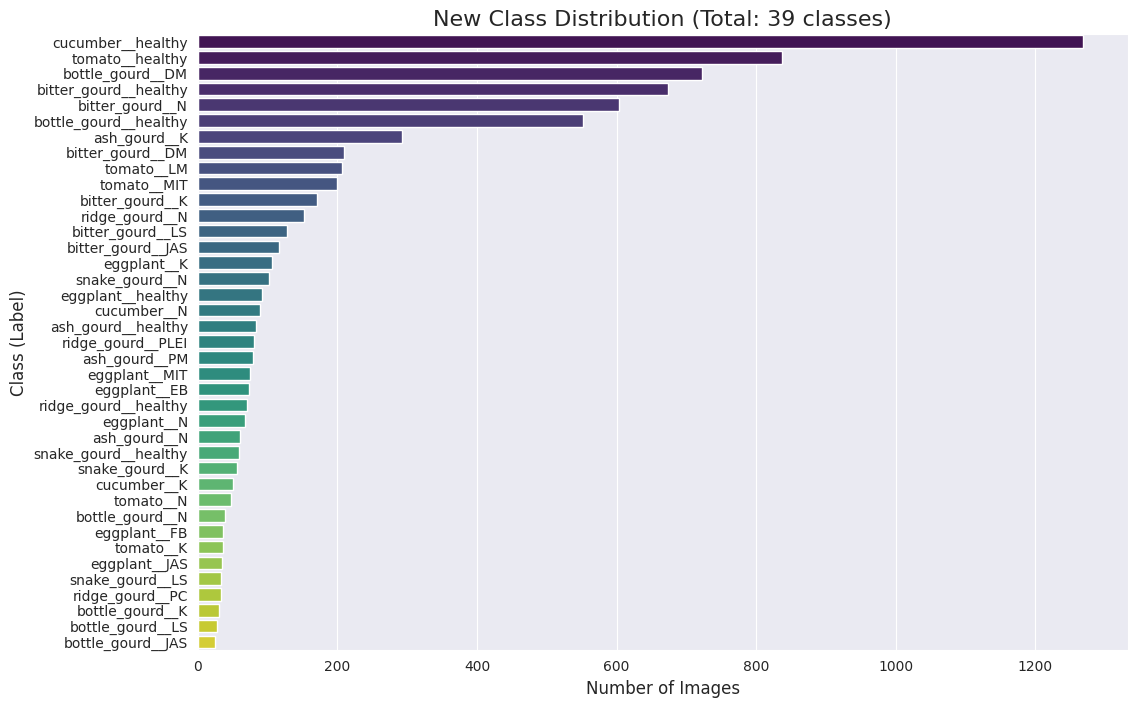

In [16]:
print("\n--- New Class Distribution ---")
print(df_filtered['label'].value_counts())

plt.figure(figsize=(12, 8))
num_new_classes = df_filtered['label'].nunique()
sns.countplot(
    y='label', 
    data=df_filtered, 
    order=df_filtered['label'].value_counts().index, 
    palette='viridis'
)
plt.title(f'New Class Distribution (Total: {num_new_classes} classes)', fontsize=16)
plt.xlabel('Number of Images', fontsize=12)
plt.ylabel('Class (Label)', fontsize=12)
plt.show()

In [17]:
from skimage.feature import graycomatrix, graycoprops, local_binary_pattern, hog
from skimage.color import rgb2gray
from sklearn.preprocessing import LabelEncoder
from tqdm.auto import tqdm

tqdm.pandas(desc="Processing Images")

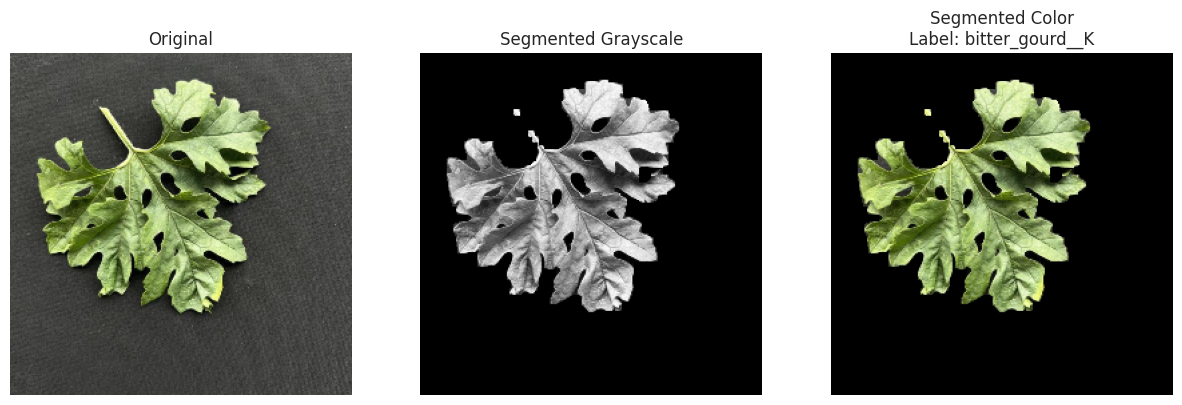

In [18]:
IMG_SIZE = 256 

def preprocess_and_segment(image_path):
    try:
        img = cv2.imread(image_path)
        img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))

        hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

        lower_green = np.array([25, 40, 40])
        upper_green = np.array([85, 255, 255]) 
        
        mask = cv2.inRange(hsv_img, lower_green, upper_green)

        kernel = np.ones((3, 3), np.uint8)
        mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel, iterations=2)
        mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel, iterations=2)
        
        segmented_color = cv2.bitwise_and(img, img, mask=mask)

        gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        segmented_gray = cv2.bitwise_and(gray_img, gray_img, mask=mask)
        
        return segmented_color, segmented_gray

    except Exception as e:
        print(f"Error processing {image_path}: {e}")
        return np.zeros((IMG_SIZE, IMG_SIZE, 3), dtype=np.uint8), \
               np.zeros((IMG_SIZE, IMG_SIZE), dtype=np.uint8)

sample_path = df_filtered['image_path'].iloc[0]
sample_label = df_filtered['label'].iloc[0]

segmented_color, segmented_gray = preprocess_and_segment(sample_path)

original_img = cv2.imread(sample_path)
original_img = cv2.resize(original_img, (IMG_SIZE, IMG_SIZE))

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB))
axes[0].set_title("Original")
axes[0].axis('off')

axes[1].imshow(segmented_gray, cmap='gray')
axes[1].set_title("Segmented Grayscale")
axes[1].axis('off')

axes[2].imshow(cv2.cvtColor(segmented_color, cv2.COLOR_BGR2RGB))
axes[2].set_title(f"Segmented Color\nLabel: {sample_label}")
axes[2].axis('off')

plt.show()

In [19]:
def extract_color_features(segmented_color):
    """Calculates a 3D HSV color histogram."""
    hsv = cv2.cvtColor(segmented_color, cv2.COLOR_BGR2HSV)
    hist = cv2.calcHist([hsv], [0, 1, 2], None, [8, 12, 3], [0, 180, 0, 256, 0, 256])
    cv2.normalize(hist, hist)
    return hist.flatten()

def extract_texture_features(segmented_gray):
    """Calculates GLCM and LBP texture features."""
    glcm = graycomatrix(segmented_gray, 
                        distances=[5], 
                        angles=[0, np.pi/4, np.pi/2, 3*np.pi/4], 
                        levels=256,
                        symmetric=True, 
                        normed=True)
    
    contrast = graycoprops(glcm, 'contrast').flatten()
    dissimilarity = graycoprops(glcm, 'dissimilarity').flatten()
    homogeneity = graycoprops(glcm, 'homogeneity').flatten()
    energy = graycoprops(glcm, 'energy').flatten()
    correlation = graycoprops(glcm, 'correlation').flatten()
    
    glcm_features = np.hstack([contrast, dissimilarity, homogeneity, energy, correlation])
    
    n_points = 24 
    radius = 8
    lbp = local_binary_pattern(segmented_gray, n_points, radius, method='uniform')
    
    (lbp_hist, _) = np.histogram(lbp.ravel(),
                                 bins=np.arange(0, n_points + 3),
                                 range=(0, n_points + 2))
    lbp_hist = lbp_hist.astype("float")
    lbp_hist /= (lbp_hist.sum() + 1e-6)
    
    return np.hstack([glcm_features, lbp_hist])

def extract_shape_features(segmented_gray):
    """Calculates Histogram of Oriented Gradients (HOG) features."""
    hog_features = hog(segmented_gray, 
                       orientations=9, 
                       pixels_per_cell=(16, 16),
                       cells_per_block=(2, 2), 
                       transform_sqrt=True, 
                       block_norm='L2-Hys',
                       feature_vector=True)
    return hog_features

In [20]:
def create_feature_vector(image_path):
    segmented_color, segmented_gray = preprocess_and_segment(image_path)
    
    if np.max(segmented_color) == 0:
        print(f"Segmentation failed for {image_path}. Skipping.")
        return np.zeros(2098) 

    color_features = extract_color_features(segmented_color)
    
    texture_features = extract_texture_features(segmented_gray)
    
    shape_features = hog(segmented_gray, 
                       orientations=9, 
                       pixels_per_cell=(32, 32),
                       cells_per_block=(2, 2), 
                       transform_sqrt=True, 
                       block_norm='L2-Hys',
                       feature_vector=True)

    return np.hstack([color_features, texture_features, shape_features])

In [21]:
df_filtered['features'] = df_filtered['image_path'].progress_apply(create_feature_vector)

plant_encoder = LabelEncoder()
df_filtered['plant_type_encoded'] = plant_encoder.fit_transform(df_filtered['plant_type'])

X_images = np.stack(df_filtered['features'].values)

X_plant_type = df_filtered['plant_type_encoded'].values.reshape(-1, 1) 

X = np.hstack([X_images, X_plant_type])

y_labels = df_filtered['label']

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y_labels)

print("\n--- Dataset Build Complete ---")
print(f"X (feature matrix) shape: {X.shape}")
print(f"y (target vector) shape: {y.shape}")
print(f"\nNumber of features per image: {X_images.shape[1]}")
print(f"Number of 'plant_type' features: {X_plant_type.shape[1]}")
print(f"Total features: {X.shape[1]}")
df_filtered.to_csv('/kaggle/working/output.csv', index=False)
np.save('/kaggle/working/X_matrix.npy', X)

print("\nSaved Label Encoder classes:")
print(label_encoder.classes_)

Processing Images:   0%|          | 0/7617 [00:00<?, ?it/s]

Segmentation failed for /kaggle/input/new-data/Cucumber/Cucumber_Healthy/IMG_6249.JPG. Skipping.
Segmentation failed for /kaggle/input/new-data/Cucumber/Cucumber_Healthy/IMG_6240.JPG. Skipping.

--- Dataset Build Complete ---
X (feature matrix) shape: (7617, 2099)
y (target vector) shape: (7617,)

Number of features per image: 2098
Number of 'plant_type' features: 1
Total features: 2099

Saved Label Encoder classes:
['ash_gourd__K' 'ash_gourd__N' 'ash_gourd__PM' 'ash_gourd__healthy'
 'bitter_gourd__DM' 'bitter_gourd__JAS' 'bitter_gourd__K'
 'bitter_gourd__LS' 'bitter_gourd__N' 'bitter_gourd__healthy'
 'bottle_gourd__DM' 'bottle_gourd__JAS' 'bottle_gourd__K'
 'bottle_gourd__LS' 'bottle_gourd__N' 'bottle_gourd__healthy'
 'cucumber__K' 'cucumber__N' 'cucumber__healthy' 'eggplant__EB'
 'eggplant__FB' 'eggplant__JAS' 'eggplant__K' 'eggplant__MIT'
 'eggplant__N' 'eggplant__healthy' 'ridge_gourd__N' 'ridge_gourd__PC'
 'ridge_gourd__PLEI' 'ridge_gourd__healthy' 'snake_gourd__K'
 'snake_gourd__

In [22]:
import numpy as np

print(f"Original X shape: {X.shape}")
print(f"Original y shape: {y.shape}")

feature_sums = np.sum(np.abs(X[:, :-1]), axis=1)
valid_mask = feature_sums > 0

X = X[valid_mask]
y = y[valid_mask]

df_filtered = df_filtered.iloc[valid_mask].reset_index(drop=True)

print(f"\nDropped {np.sum(~valid_mask)} failed rows.")
print(f"Cleaned X shape: {X.shape}")
print(f"Cleaned y shape: {y.shape}")

np.save('/kaggle/working/X_matrix_clean.npy', X)
df_filtered.to_csv('/kaggle/working/output_clean.csv', index=False)

Original X shape: (7617, 2099)
Original y shape: (7617,)

Dropped 2 failed rows.
Cleaned X shape: (7615, 2099)
Cleaned y shape: (7615,)


# SMOTE

In [23]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np

print("--- 1. Applying SMOTE (Synthetic Minority Over-sampling) ---")

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

print(f"Original X shape: {X.shape}")
print(f"Resampled X shape: {X_resampled.shape} (Balanced!)")

y_resampled_strings = label_encoder.inverse_transform(y_resampled)

df_temp = pd.DataFrame({'label': y_resampled_strings})
df_temp[['plant_type', 'status']] = df_temp['label'].str.split('__', n=1, expand=True)


plant_encoder_multi = LabelEncoder()
status_encoder_multi = LabelEncoder()

y_plant_final = plant_encoder_multi.fit_transform(df_temp['plant_type'])
y_status_final = status_encoder_multi.fit_transform(df_temp['status'])

y_multi_final = np.stack([y_plant_final, y_status_final], axis=1)

print(f"Final Multi-Output Target Shape: {y_multi_final.shape}")

--- 1. Applying SMOTE (Synthetic Minority Over-sampling) ---
Original X shape: (7615, 2099)
Resampled X shape: (49413, 2099) (Balanced!)
Final Multi-Output Target Shape: (49413, 2)


In [24]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

print("\n--- 2. Splitting, Scaling, and PCA ---")

X_train, X_test, y_train_multi, y_test_multi = train_test_split(
    X_resampled, y_multi_final,
    test_size=0.25,
    random_state=42,
    stratify=y_plant_final 
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

pca = PCA(n_components=464, random_state=42)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

print(f"Train PCA Shape: {X_train_pca.shape}")
print(f"Test PCA Shape:  {X_test_pca.shape}")


--- 2. Splitting, Scaling, and PCA ---
Train PCA Shape: (37059, 464)
Test PCA Shape:  (12354, 464)


In [25]:
from sklearn.metrics import classification_report, accuracy_score, f1_score

def evaluate_multi_output(y_true, y_pred, model_name):
    print(f"\n========================================")
    print(f"  EVALUATION: {model_name}")
    print(f"========================================")
    
    y_true_plant = y_true[:, 0]
    y_true_status = y_true[:, 1]
    
    y_pred_plant = y_pred[:, 0]
    y_pred_status = y_pred[:, 1]
    
    # Report 1: Plant Type
    print(f"\n[ Target 1: Plant Type ]")
    print(f"Accuracy: {accuracy_score(y_true_plant, y_pred_plant):.4f}")
    
    # Report 2: Status (The most important one)
    print(f"\n[ Target 2: Status ]")
    print(f"Accuracy: {accuracy_score(y_true_status, y_pred_status):.4f}")
    print(f"Macro F1: {f1_score(y_true_status, y_pred_status, average='macro'):.4f}")
    
    print("\nDetailed Status Report:")
    print(classification_report(
        y_true_status, 
        y_pred_status, 
        target_names=status_encoder_multi.classes_,
        zero_division=0 
    ))

In [26]:
from sklearn.neighbors import KNeighborsClassifier

print("--- Training KNN ---")
knn = KNeighborsClassifier(n_neighbors=7, n_jobs=-1)
knn.fit(X_train_pca, y_train_multi)

evaluate_multi_output(y_test_multi, knn.predict(X_test_pca), "KNN + PCA")

--- Training KNN ---

  EVALUATION: KNN + PCA

[ Target 1: Plant Type ]
Accuracy: 0.9949

[ Target 2: Status ]
Accuracy: 0.9744
Macro F1: 0.9820

Detailed Status Report:
              precision    recall  f1-score   support

          DM       0.97      0.98      0.98       645
          EB       0.99      1.00      1.00       304
          FB       1.00      1.00      1.00       311
         JAS       0.99      1.00      1.00       922
           K       0.96      0.99      0.97      2208
          LM       0.92      0.97      0.95       319
          LS       0.98      1.00      0.99       954
         MIT       0.96      0.99      0.97       623
           N       0.97      0.98      0.98      2582
          PC       1.00      1.00      1.00       317
        PLEI       0.99      1.00      1.00       322
          PM       0.99      1.00      0.99       350
     healthy       0.98      0.92      0.95      2497

    accuracy                           0.97     12354
   macro avg      

In [27]:
evaluate_multi_output(y_train_multi, knn.predict(X_train_pca), "KNN + PCA")


  EVALUATION: KNN + PCA

[ Target 1: Plant Type ]
Accuracy: 0.9957

[ Target 2: Status ]
Accuracy: 0.9817
Macro F1: 0.9863

Detailed Status Report:
              precision    recall  f1-score   support

          DM       0.98      0.99      0.98      1889
          EB       0.99      1.00      1.00       963
          FB       1.00      1.00      1.00       956
         JAS       0.99      1.00      1.00      2879
           K       0.98      0.99      0.98      6661
          LM       0.91      0.99      0.95       948
          LS       0.99      1.00      0.99      2847
         MIT       0.96      1.00      0.98      1911
           N       0.98      0.99      0.98      7554
          PC       1.00      1.00      1.00       950
        PLEI       1.00      1.00      1.00       945
          PM       0.99      1.00      1.00       917
     healthy       0.99      0.94      0.96      7639

    accuracy                           0.98     37059
   macro avg       0.98      0.99      

In [28]:
from sklearn.tree import DecisionTreeClassifier

print("--- Training Decision Tree ---")
dt = DecisionTreeClassifier(class_weight='balanced', random_state=42)
dt.fit(X_train_pca, y_train_multi)

evaluate_multi_output(y_test_multi, dt.predict(X_test_pca), "Decision Tree + PCA")

--- Training Decision Tree ---

  EVALUATION: Decision Tree + PCA

[ Target 1: Plant Type ]
Accuracy: 0.8961

[ Target 2: Status ]
Accuracy: 0.8463
Macro F1: 0.8711

Detailed Status Report:
              precision    recall  f1-score   support

          DM       0.81      0.83      0.82       645
          EB       0.92      0.88      0.90       304
          FB       0.91      0.92      0.92       311
         JAS       0.88      0.91      0.90       922
           K       0.84      0.85      0.85      2208
          LM       0.87      0.84      0.85       319
          LS       0.90      0.90      0.90       954
         MIT       0.86      0.90      0.88       623
           N       0.82      0.84      0.83      2582
          PC       0.94      0.92      0.93       317
        PLEI       0.91      0.90      0.90       322
          PM       0.86      0.86      0.86       350
     healthy       0.80      0.76      0.78      2497

    accuracy                           0.85     1235

In [29]:
evaluate_multi_output(y_train_multi, dt.predict(X_train_pca), "DT + PCA")


  EVALUATION: DT + PCA

[ Target 1: Plant Type ]
Accuracy: 1.0000

[ Target 2: Status ]
Accuracy: 0.9999
Macro F1: 0.9999

Detailed Status Report:
              precision    recall  f1-score   support

          DM       1.00      1.00      1.00      1889
          EB       1.00      1.00      1.00       963
          FB       1.00      1.00      1.00       956
         JAS       1.00      1.00      1.00      2879
           K       1.00      1.00      1.00      6661
          LM       1.00      1.00      1.00       948
          LS       1.00      1.00      1.00      2847
         MIT       1.00      1.00      1.00      1911
           N       1.00      1.00      1.00      7554
          PC       1.00      1.00      1.00       950
        PLEI       1.00      1.00      1.00       945
          PM       1.00      1.00      1.00       917
     healthy       1.00      1.00      1.00      7639

    accuracy                           1.00     37059
   macro avg       1.00      1.00      1

In [30]:
from sklearn.ensemble import RandomForestClassifier

print("--- Training Random Forest ---")
rf = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42, n_jobs=-1)
rf.fit(X_train_pca, y_train_multi)

evaluate_multi_output(y_test_multi, rf.predict(X_test_pca), "Random Forest + PCA")

--- Training Random Forest ---

  EVALUATION: Random Forest + PCA

[ Target 1: Plant Type ]
Accuracy: 0.9933

[ Target 2: Status ]
Accuracy: 0.9850
Macro F1: 0.9893

Detailed Status Report:
              precision    recall  f1-score   support

          DM       1.00      0.95      0.97       645
          EB       1.00      0.98      0.99       304
          FB       1.00      1.00      1.00       311
         JAS       1.00      0.99      1.00       922
           K       0.99      0.99      0.99      2208
          LM       0.98      0.99      0.98       319
          LS       1.00      1.00      1.00       954
         MIT       0.99      0.98      0.99       623
           N       0.98      0.98      0.98      2582
          PC       1.00      1.00      1.00       317
        PLEI       1.00      1.00      1.00       322
          PM       1.00      0.98      0.99       350
     healthy       0.96      0.98      0.97      2497

    accuracy                           0.99     1235

In [43]:
evaluate_multi_output(y_train_multi, rf.predict(X_train_pca), "Random Forest + PCA")


  EVALUATION: Random Forest + PCA

[ Target 1: Plant Type ]
Accuracy: 1.0000

[ Target 2: Status ]
Accuracy: 0.9999
Macro F1: 0.9999

Detailed Status Report:
              precision    recall  f1-score   support

          DM       1.00      1.00      1.00      1889
          EB       1.00      1.00      1.00       963
          FB       1.00      1.00      1.00       956
         JAS       1.00      1.00      1.00      2879
           K       1.00      1.00      1.00      6661
          LM       1.00      1.00      1.00       948
          LS       1.00      1.00      1.00      2847
         MIT       1.00      1.00      1.00      1911
           N       1.00      1.00      1.00      7554
          PC       1.00      1.00      1.00       950
        PLEI       1.00      1.00      1.00       945
          PM       1.00      1.00      1.00       917
     healthy       1.00      1.00      1.00      7639

    accuracy                           1.00     37059
   macro avg       1.00      

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.multioutput import MultiOutputClassifier

print("--- Training Logistic Regression ---")
log_reg = MultiOutputClassifier(
    LogisticRegression(solver='liblinear', random_state=42), 
    n_jobs=-1
)
log_reg.fit(X_train_pca, y_train_multi)

evaluate_multi_output(y_test_multi, log_reg.predict(X_test_pca), "Logistic Regression + PCA")

--- Training Logistic Regression ---


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1296: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will be raised in 1.8. Either use another solver which supports the multinomial loss or wrap the estimator in a OneVsRestClassifier to keep applying a one-versus-rest scheme.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1296: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will be raised in 1.8. Either use another solver which supports the multinomial loss or wrap the estimator in a OneVsRestClassifier to keep applying a one-versus-rest scheme.
  warnings.warn(



  EVALUATION: Logistic Regression + PCA

[ Target 1: Plant Type ]
Accuracy: 0.9970

[ Target 2: Status ]
Accuracy: 0.9055
Macro F1: 0.9553

Detailed Status Report:
              precision    recall  f1-score   support

          DM       0.95      0.95      0.95       645
          EB       1.00      0.99      1.00       304
          FB       1.00      1.00      1.00       311
         JAS       0.98      0.99      0.98       922
           K       0.88      0.88      0.88      2208
          LM       0.97      1.00      0.98       319
          LS       0.97      1.00      0.99       954
         MIT       0.95      0.97      0.96       623
           N       0.85      0.85      0.85      2582
          PC       1.00      1.00      1.00       317
        PLEI       1.00      1.00      1.00       322
          PM       1.00      1.00      1.00       350
     healthy       0.84      0.82      0.83      2497

    accuracy                           0.91     12354
   macro avg       0.95

In [44]:
evaluate_multi_output(y_train_multi, log_reg.predict(X_train_pca), "Logistic Regression + PCA")


  EVALUATION: Logistic Regression + PCA

[ Target 1: Plant Type ]
Accuracy: 0.9999

[ Target 2: Status ]
Accuracy: 0.9171
Macro F1: 0.9639

Detailed Status Report:
              precision    recall  f1-score   support

          DM       0.98      0.99      0.98      1889
          EB       1.00      1.00      1.00       963
          FB       1.00      1.00      1.00       956
         JAS       0.99      1.00      0.99      2879
           K       0.88      0.89      0.88      6661
          LM       0.99      1.00      0.99       948
          LS       0.99      1.00      0.99      2847
         MIT       0.97      0.98      0.98      1911
           N       0.86      0.86      0.86      7554
          PC       1.00      1.00      1.00       950
        PLEI       1.00      1.00      1.00       945
          PM       1.00      1.00      1.00       917
     healthy       0.86      0.84      0.85      7639

    accuracy                           0.92     37059
   macro avg       0.96

In [32]:
from sklearn.ensemble import AdaBoostClassifier

print("--- Training AdaBoost ---")
ada = MultiOutputClassifier(
    AdaBoostClassifier(n_estimators=50, random_state=42), 
    n_jobs=-1
)
ada.fit(X_train_pca, y_train_multi)

evaluate_multi_output(y_test_multi, ada.predict(X_test_pca), "AdaBoost + PCA")

--- Training AdaBoost ---

  EVALUATION: AdaBoost + PCA

[ Target 1: Plant Type ]
Accuracy: 0.5324

[ Target 2: Status ]
Accuracy: 0.2444
Macro F1: 0.1257

Detailed Status Report:
              precision    recall  f1-score   support

          DM       0.25      0.00      0.01       645
          EB       0.00      0.00      0.00       304
          FB       0.00      0.00      0.00       311
         JAS       0.07      0.01      0.02       922
           K       0.22      0.38      0.28      2208
          LM       0.00      0.00      0.00       319
          LS       0.11      0.02      0.04       954
         MIT       0.25      0.27      0.26       623
           N       0.28      0.48      0.35      2582
          PC       0.28      0.10      0.14       317
        PLEI       0.41      0.24      0.30       322
          PM       0.00      0.00      0.00       350
     healthy       0.22      0.25      0.24      2497

    accuracy                           0.24     12354
   macro

In [45]:
evaluate_multi_output(y_train_multi, ada.predict(X_train_pca), "AdaBoost + PCA")


  EVALUATION: AdaBoost + PCA

[ Target 1: Plant Type ]
Accuracy: 0.5299

[ Target 2: Status ]
Accuracy: 0.2448
Macro F1: 0.1272

Detailed Status Report:
              precision    recall  f1-score   support

          DM       0.19      0.00      0.00      1889
          EB       0.17      0.00      0.01       963
          FB       0.00      0.00      0.00       956
         JAS       0.09      0.01      0.02      2879
           K       0.22      0.38      0.28      6661
          LM       0.00      0.00      0.00       948
          LS       0.11      0.02      0.04      2847
         MIT       0.26      0.26      0.26      1911
           N       0.28      0.50      0.36      7554
          PC       0.35      0.12      0.18       950
        PLEI       0.35      0.23      0.28       945
          PM       0.00      0.00      0.00       917
     healthy       0.22      0.25      0.23      7639

    accuracy                           0.24     37059
   macro avg       0.17      0.14 

In [41]:
from sklearn.svm import LinearSVC

print("--- Training SVM ---")
svm = MultiOutputClassifier(
    LinearSVC(C=1, random_state=42, max_iter=10000), 
    n_jobs=-1
)
svm.fit(X_train_pca, y_train_multi)

evaluate_multi_output(y_test_multi, svm.predict(X_test_pca), "SVM + PCA")

--- Training SVM ---


/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(



  EVALUATION: SVM + PCA

[ Target 1: Plant Type ]
Accuracy: 0.9972

[ Target 2: Status ]
Accuracy: 0.9032
Macro F1: 0.9539

Detailed Status Report:
              precision    recall  f1-score   support

          DM       0.96      0.96      0.96       645
          EB       0.99      0.99      0.99       304
          FB       0.98      1.00      0.99       311
         JAS       0.98      1.00      0.99       922
           K       0.87      0.88      0.87      2208
          LM       0.96      1.00      0.98       319
          LS       0.98      1.00      0.99       954
         MIT       0.95      1.00      0.97       623
           N       0.85      0.84      0.84      2582
          PC       0.99      1.00      1.00       317
        PLEI       0.99      1.00      1.00       322
          PM       0.99      1.00      0.99       350
     healthy       0.84      0.80      0.82      2497

    accuracy                           0.90     12354
   macro avg       0.95      0.96      

In [46]:
evaluate_multi_output(y_train_multi, svm.predict(X_train_pca), "SVM + PCA")


  EVALUATION: SVM + PCA

[ Target 1: Plant Type ]
Accuracy: 1.0000

[ Target 2: Status ]
Accuracy: 0.9170
Macro F1: 0.9657

Detailed Status Report:
              precision    recall  f1-score   support

          DM       0.99      1.00      0.99      1889
          EB       1.00      1.00      1.00       963
          FB       0.99      1.00      0.99       956
         JAS       1.00      1.00      1.00      2879
           K       0.87      0.89      0.88      6661
          LM       0.99      1.00      1.00       948
          LS       1.00      1.00      1.00      2847
         MIT       0.99      1.00      0.99      1911
           N       0.86      0.86      0.86      7554
          PC       1.00      1.00      1.00       950
        PLEI       1.00      1.00      1.00       945
          PM       0.99      1.00      1.00       917
     healthy       0.86      0.83      0.85      7639

    accuracy                           0.92     37059
   macro avg       0.96      0.97      

In [37]:
import pandas as pd
import numpy as np
import cv2

def predict_single_image(image_path, true_plant_name, true_status_name="Unknown"):
    print(f"\n --- Testing Image: {image_path} ---")
    print(f" True Label: {true_plant_name} | {true_status_name}")
    
    features_manual = create_feature_vector(image_path)
    
    try:
        plant_encoded = plant_encoder.transform([true_plant_name])[0]
    except ValueError:
        print(f" Error: Plant '{true_plant_name}' not seen in training. Using 0.")
        plant_encoded = 0
        
    X_new_manual = np.hstack([features_manual, [plant_encoded]])
    
    X_new_manual_scaled = scaler.transform(X_new_manual.reshape(1, -1))

    X_new_manual_pca = pca.transform(X_new_manual_scaled)

    models_to_test = {
        "KNN": knn,
        "Decision Tree": dt,
        "Random Forest": rf,
        "Ada boost": ada,
        "Logistic Rgeression": log_reg
    }

    print("\n---  Model Predictions ---")
    print(f"{'Model':<20} | {'Predicted Plant':<15} | {'Predicted Status'}")
    print("-" * 60)

    for name, model in models_to_test.items():
        try:
            pred = model.predict(X_new_manual_pca)[0]
            
            p_plant = plant_encoder_multi.inverse_transform([int(pred[0])])[0]
            p_status = status_encoder_multi.inverse_transform([int(pred[1])])[0]
            
            print(f"{name:<20} | {p_plant:<15} | {p_status}")
        except Exception as e:
            print(f"{name:<20} | Error: {e} (Model might not be trained)")


test_image_path = "/kaggle/input/olid-i/tomato__K/tomato__K (13).JPG" 
test_plant = "Tomato"
test_status = "K"

predict_single_image(test_image_path, test_plant, test_status)


🔍 --- Testing Image: /kaggle/input/olid-i/tomato__K/tomato__K (13).JPG ---
📝 True Label: bitter_gourd | N

--- 🤖 Model Predictions ---
Model                | Predicted Plant | Predicted Status
------------------------------------------------------------
KNN                  | tomato          | K
Decision Tree        | tomato          | K
Random Forest        | tomato          | K


# AUTO Encoder

In [ ]:
import numpy as np
import cv2
from tqdm.auto import tqdm
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

IMG_SIZE_AE = 128 

def load_pixel_data(df):
    """
    Loads images, segments them, resizes to 128x128, and normalizes to 0-1.
    Returns a numpy array of shape (N, 128, 128, 3)
    """
    pixel_data = []
    
    for path in tqdm(df['image_path'], desc="Loading & Segmenting Images"):
        try:
            img = cv2.imread(path)
            img = cv2.resize(img, (IMG_SIZE_AE, IMG_SIZE_AE))
            
            hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
            lower_green = np.array([25, 40, 40])
            upper_green = np.array([85, 255, 255])
            mask = cv2.inRange(hsv, lower_green, upper_green)
            segmented = cv2.bitwise_and(img, img, mask=mask)
            
            segmented = segmented.astype('float32') / 255.0
            
            pixel_data.append(segmented)
            
        except Exception as e:
            print(f"Error: {e}")
            pixel_data.append(np.zeros((IMG_SIZE_AE, IMG_SIZE_AE, 3)))

    return np.array(pixel_data)

print("Loading pixel data for AutoEncoder...")
X_pixels = load_pixel_data(df_filtered)

print(f"Pixel Data Shape: {X_pixels.shape}")

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, Input

def build_autoencoder(input_shape):
    input_img = Input(shape=input_shape)
    
    x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
    x = layers.MaxPooling2D((2, 2), padding='same')(x)
    
    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = layers.MaxPooling2D((2, 2), padding='same')(x) 
    
    x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = layers.MaxPooling2D((2, 2), padding='same')(x)
    
    encoded = layers.GlobalAveragePooling2D()(x)

    x = layers.Reshape((1, 1, 128))(encoded)
    x = layers.UpSampling2D((16, 16))(x) 
    
    x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = layers.UpSampling2D((2, 2))(x) 
    
    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = layers.UpSampling2D((2, 2))(x) 
    
    x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
    x = layers.UpSampling2D((2, 2))(x) 
    
    decoded = layers.Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)
    
    autoencoder = models.Model(input_img, decoded)

    encoder = models.Model(input_img, encoded)
    
    return autoencoder, encoder

autoencoder, encoder = build_autoencoder((IMG_SIZE_AE, IMG_SIZE_AE, 3))
autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.summary()

In [ ]:
X_train_ae, X_val_ae = train_test_split(X_pixels, test_size=0.1, random_state=42)

print("--- Training AutoEncoder ---")
history = autoencoder.fit(
    X_train_ae, X_train_ae, 
    epochs=20,              
    batch_size=32,
    shuffle=True,
    validation_data=(X_val_ae, X_val_ae),
    verbose=1
)

# Plot loss to see if it learned
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('AutoEncoder Reconstruction Error')
plt.legend()
plt.show()

In [ ]:
print("--- Extracting Features with Encoder ---")

X_learned_features = encoder.predict(X_pixels)

print(f"New Feature Matrix Shape: {X_learned_features.shape}")

plant_type_col = df_filtered['plant_type_encoded'].values.reshape(-1, 1)

X_final_ae = np.hstack([X_learned_features, plant_type_col])

print(f"Final X Shape (Features + PlantType): {X_final_ae.shape}")

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, f1_score

X_train_ae, X_test_ae, y_train_multi, y_test_multi = train_test_split(
    X_final_ae, y_multi, 
    test_size=0.25,
    random_state=42,
    stratify=y_multi[:, 0] 
)

rf_ae = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
rf_ae.fit(X_train_ae, y_train_multi)

y_pred_ae = rf_ae.predict(X_test_ae)

print("--- Random Forest on AutoEncoder Features ---")
evaluate_multi_output(y_test_multi, y_pred_ae, "RF + AutoEncoder")

Calculating SHAP values for Random Forest... (This might take a minute)
Generating Summary Plot for Status (Target 2)...


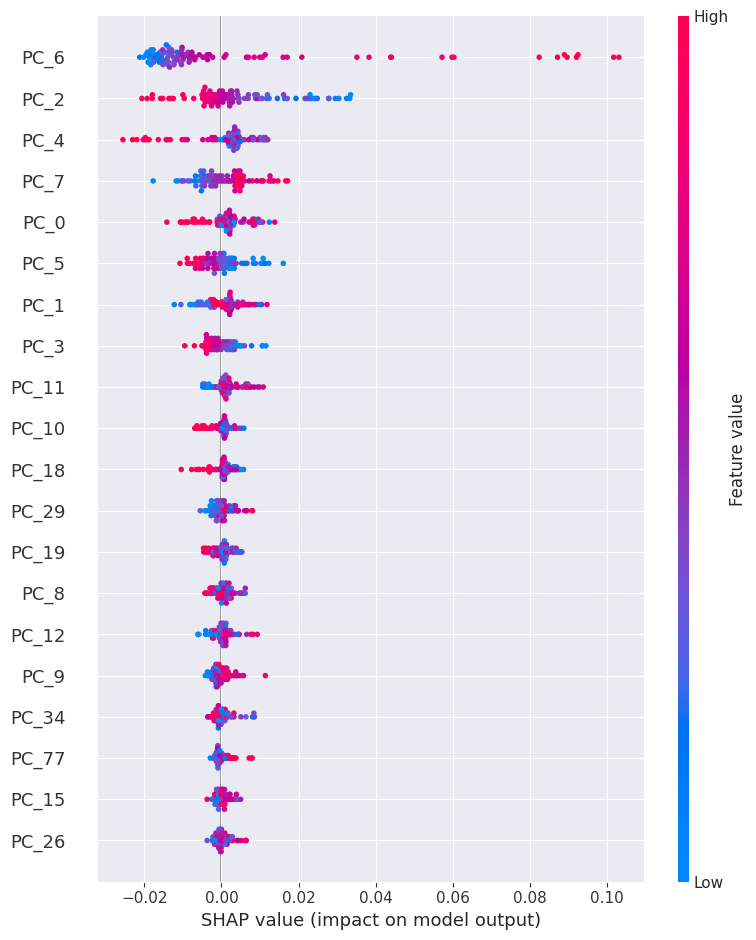

Showing feature importance specifically for class: 'healthy'
Could not find 'healthy' class index automatically.


In [42]:
import shap
import matplotlib.pyplot as plt

shap.initjs()

subset_idx = np.random.choice(X_test_pca.shape[0], 100, replace=False)
X_test_subset = X_test_pca[subset_idx]

explainer_rf = shap.TreeExplainer(rf)

print("Calculating SHAP values for Random Forest... (This might take a minute)")
shap_values_rf = explainer_rf.shap_values(X_test_subset, check_additivity=False)

print(f"Generating Summary Plot for Status (Target 2)...")
shap.summary_plot(
    shap_values_rf[1],
    X_test_subset, 
    feature_names=[f"PC_{i}" for i in range(X_test_subset.shape[1])],
    class_names=status_encoder_multi.classes_
)

try:
    healthy_idx = list(status_encoder_multi.classes_).index('healthy')
    print(f"Showing feature importance specifically for class: 'healthy'")
    shap.summary_plot(
        shap_values_rf[1][healthy_idx], 
        X_test_subset,
        feature_names=[f"PC_{i}" for i in range(X_test_subset.shape[1])]
    )
except:
    print("Could not find 'healthy' class index automatically.")